In [1]:
import random
import matplotlib.pyplot as plt
from functools import reduce
import itertools as it
from collections import Counter
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
# import altair as alt
import pandas as pd

import numpy.random as npr

In [2]:
n = 20
m = 10 * n

max_strat = 6
min_strat = -5

max_score = 5
min_score = -5

cost = 1
benefit_score = 1
benefit = 10

generations = 100000
mutation_probability = 0.001

In [3]:
class Agent:
    def __init__(self, strategy, score, payoff):
        self.payoff = payoff
        self.strategy = strategy
        self.score = score
        
    def add_score(self, new_score):
        temp_score = new_score + self.score
        if temp_score >= min_score and temp_score <= max_score:
             self.score = temp_score
        elif temp_score <= min_score:
            self.score = min_score
        elif temp_score >= max_score:
            self.score = max_score

In [4]:
def selectOne_t(population):
    max_value     = sum([c.payoff for c in population])
    pick    = random.uniform(0, max_value)
    current = 0
    for agent in population:
        current += agent.payoff
        if current > pick:
            return agent
        
def selectOne(population):
    max_value = sum([c.payoff for c in population])
    selection_probs = [c.payoff/max_value for c in population]
    return population[npr.choice(len(population), p=selection_probs)]


In [5]:
#value = np.random.normal(loc=n/2, scale=1, size=10000)
#plt.hist([v for v in value if (v > 0 and v < n)], bins = 100)
#plt.show()

In [6]:
def get_number_of_agents_to_watch():
    agents_that_watch = int(np.random.normal(loc=10, scale=1))
    while agents_that_watch < 0 or agents_that_watch > 20: # we need to have n-2 because we don't want the donor nor the recipient to be choosen as agents that observe...
        #we also need that the number is at least 2 because we want a donor and a recipient...
        agents_that_watch = int(np.random.normal(loc=10, scale=1))
    return agents_that_watch


#def get_number_of_agents_to_watch():
#    agents_that_watch = int(np.random.normal(loc=(0+20)/2, scale=1))
#    while agents_that_watch < 2 or agents_that_watch > (n-2): # we need to have n-2 because we don't want the donor nor the recipient to be choosen as agents that observe...
#        #we also need that the number is at least 2 because we want a donor and a recipient...
#        agents_that_watch = int(np.random.normal(loc=n/2, scale=1))
#    return agents_that_watch

print(get_number_of_agents_to_watch())


def get_random_normal_strategy():
    random_strategy = random.randint(min_strat, max_strat)
    #random_strategy = round(np.random.normal(loc=(min_strat+max_strat)/2, scale=5))
    #while random_strategy < min_strat or random_strategy > (max_strat): # we need to have n-2 because we don't want the donor nor the recipient to be choosen as agents that observe...
        #we also need that the number is at least 2 because we want a donor and a recipient...
    #    random_strategy = round(np.random.normal(loc=(min_strat+max_strat)/2, scale=5))
    return random_strategy

12


generations: 100000
0
[ 2 -2 -5 -2 -2 -5 -5  4 -2 -5 -1 -4  4  2  4 -5 -5 -5 -2 -2]


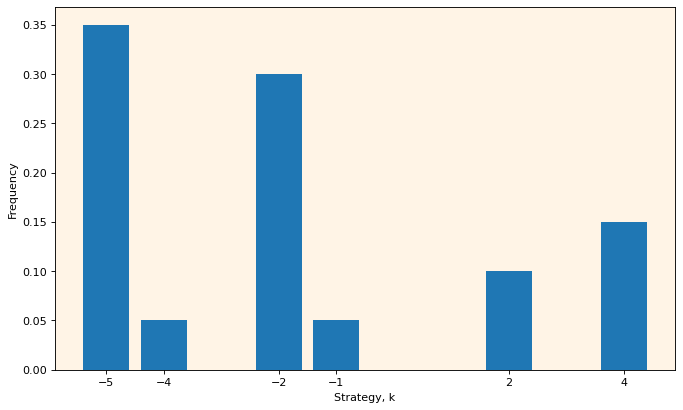

here
10000
[ 2 -2 -5 ... -1 -1 -1]


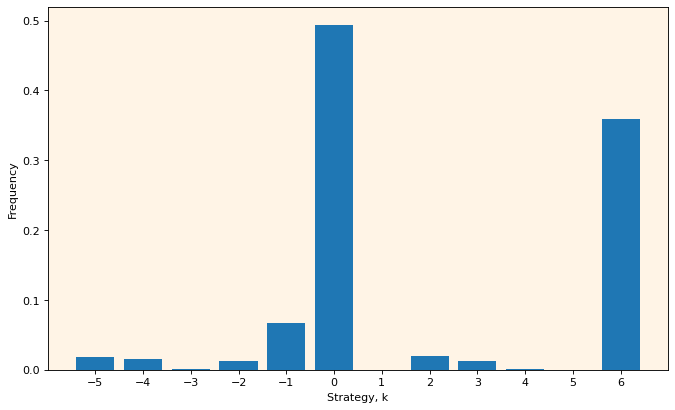

here
20000
[ 2 -2 -5 ...  4  4  4]


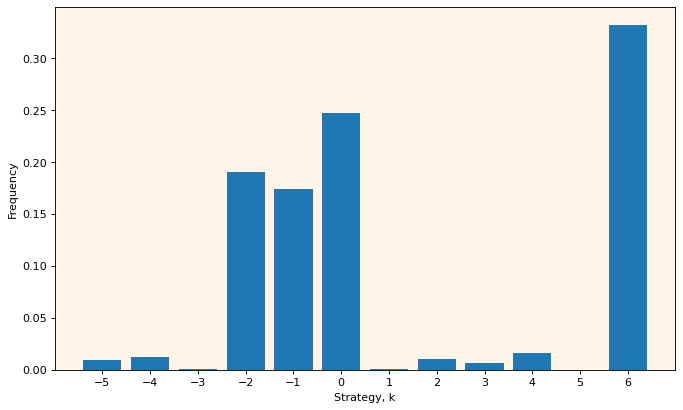

here
30000
[ 2 -2 -5 ...  4  4  4]


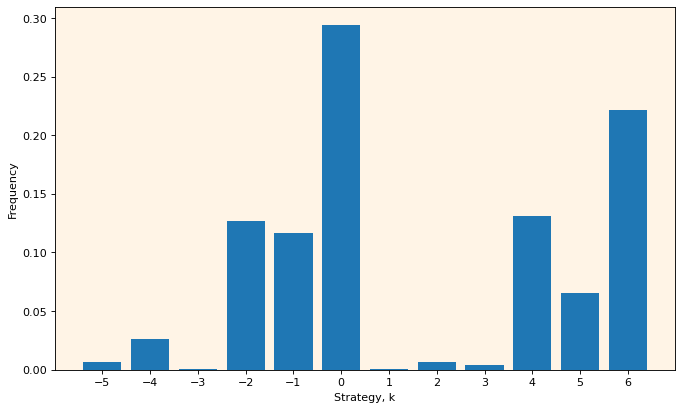

here
40000
[ 2 -2 -5 ...  6  6  6]


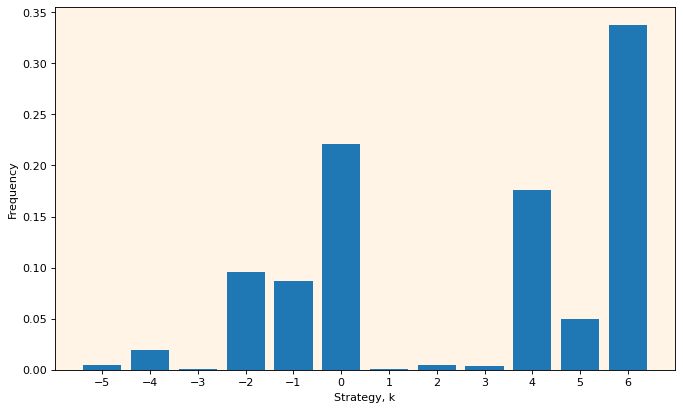

here
50000
[ 2 -2 -5 ...  0  0  0]


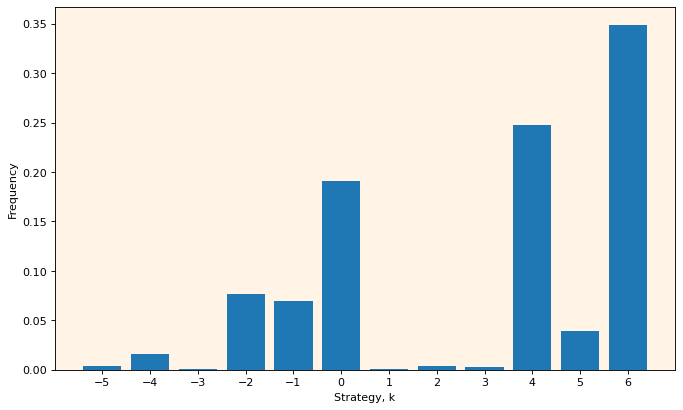

here
60000
[ 2 -2 -5 ...  6  6  6]


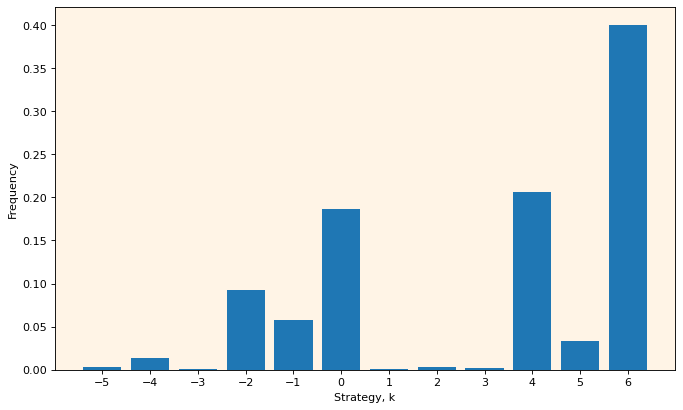

here
70000
[ 2 -2 -5 ...  0  0  0]


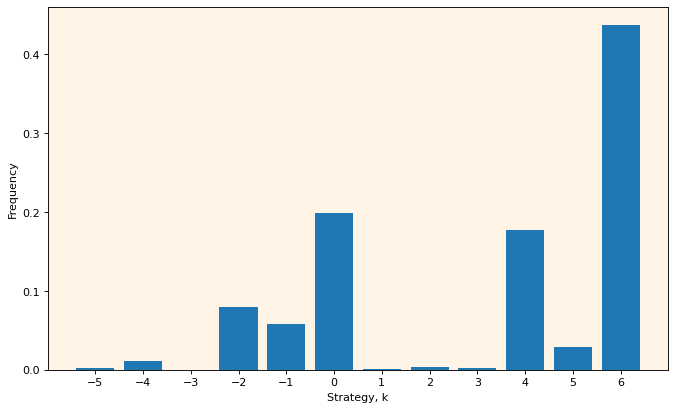

here
80000
[ 2 -2 -5 ...  5  5  5]


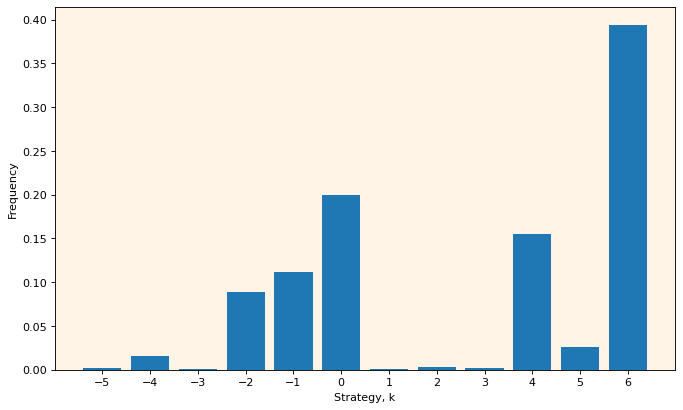

here
90000
[ 2 -2 -5 ...  5  5  5]


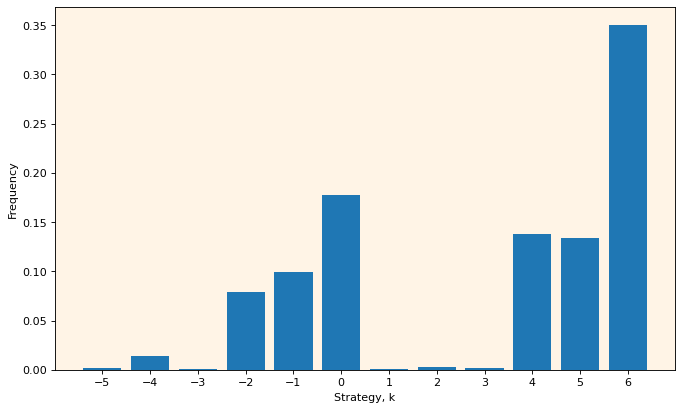

here
[ 2 -2 -5 ...  5  5  5]
Done :D


In [7]:
agents = []
strategies_choosen = []
agent_matrix = np.zeros((n,n))

for i in range(n):
    #agents.append(Agent(random.randint(min_strat, max_strat), 0, 0))
    agents.append(Agent(get_random_normal_strategy(), 0,0))
    
print("generations: {}".format(generations))
for generation in range(int(generations)):
    
    if generation % 10000 == 0:
        print(generation)
        
    for pair in range(m):
        number_of_watchers = get_number_of_agents_to_watch()
        agents_to_sample_from = random.sample(range(n), number_of_watchers)
        donor, recipient = agents[agents_to_sample_from[0]], agents[agents_to_sample_from[1]]
        
        if agent_matrix[agents_to_sample_from[1]][agents_to_sample_from[0]] >= donor.strategy:
            recipient.payoff += benefit
            donor.payoff -= cost
                
            donor.add_score(benefit_score)

            for observer in agents_to_sample_from:
                if agent_matrix[agents_to_sample_from[1]][observer] >= 0:
                    agent_matrix[agents_to_sample_from[0]][observer] += benefit_score
                else :
                    agent_matrix[agents_to_sample_from[0]][observer] -= benefit_score
        else:
            donor.add_score(-benefit_score)
            for observer in agents_to_sample_from:
                if agent_matrix[agents_to_sample_from[1]][observer] >= 0:
                    agent_matrix[agents_to_sample_from[0]][observer] -= benefit_score
                else :
                    agent_matrix[agents_to_sample_from[0]][observer] += benefit_score
            
    #    recipient.payoff += c
    #    donor.payoff += c
    # we need to add +c because otherwise we will have trouble selecting an agent...
    #for agent in agents:
    #    if agent.payoff < 0:
    #        agent.payoff = 0

    current_payoffs = []
    for agent in agents:
        current_payoffs.append(agent.payoff)
            
    min_payoff = min(current_payoffs)
        
    if min_payoff <= 0:
        for agent in agents:
            agent.payoff = agent.payoff + (-1)*min_payoff + 1
    elif min_payoff >1:
        for agent in agents:
            agent.payoff = agent.payoff - (min_payoff -  1)
    
    new_agents = []

    
    if sum([c.payoff for c in agents]) == 0:
        for agent_toCopy in agents:
            new_agents.append(Agent(agent_toCopy.strategy, 0,0))
    else:
        for agent in range(n):
            random_value = random.uniform(0.000, 1.000)

            if random_value <= mutation_probability:
                new_agents.append(Agent(get_random_normal_strategy(), 0,0))
            else:
                parent = selectOne(agents)
                new_agents.append(Agent(parent.strategy, 0,0))
            
    agents = new_agents
    
    for agent in agents:
        strategies_choosen.append(agent.strategy)    
        
    if generation % 10000 == 0:
        print("generation: ", generation)
        figure(figsize=(10, 6), dpi=80)
        ax = plt.gca()
        ax.set_facecolor("#fff4e6")

        plt.xlabel('Strategy, k')
        plt.ylabel('Frequency')
        strategies_choosen_np = np.array(strategies_choosen)
        print(strategies_choosen_np)
        
        labels, counts = np.unique(strategies_choosen_np, return_counts=True)
        plt.bar(labels, counts/len(strategies_choosen_np), align='center')
        plt.gca().set_xticks(labels)
        plt.show()

             
    agent_matrix = np.zeros((n,n))
    
print(strategies_choosen_np)
print("Done :D")

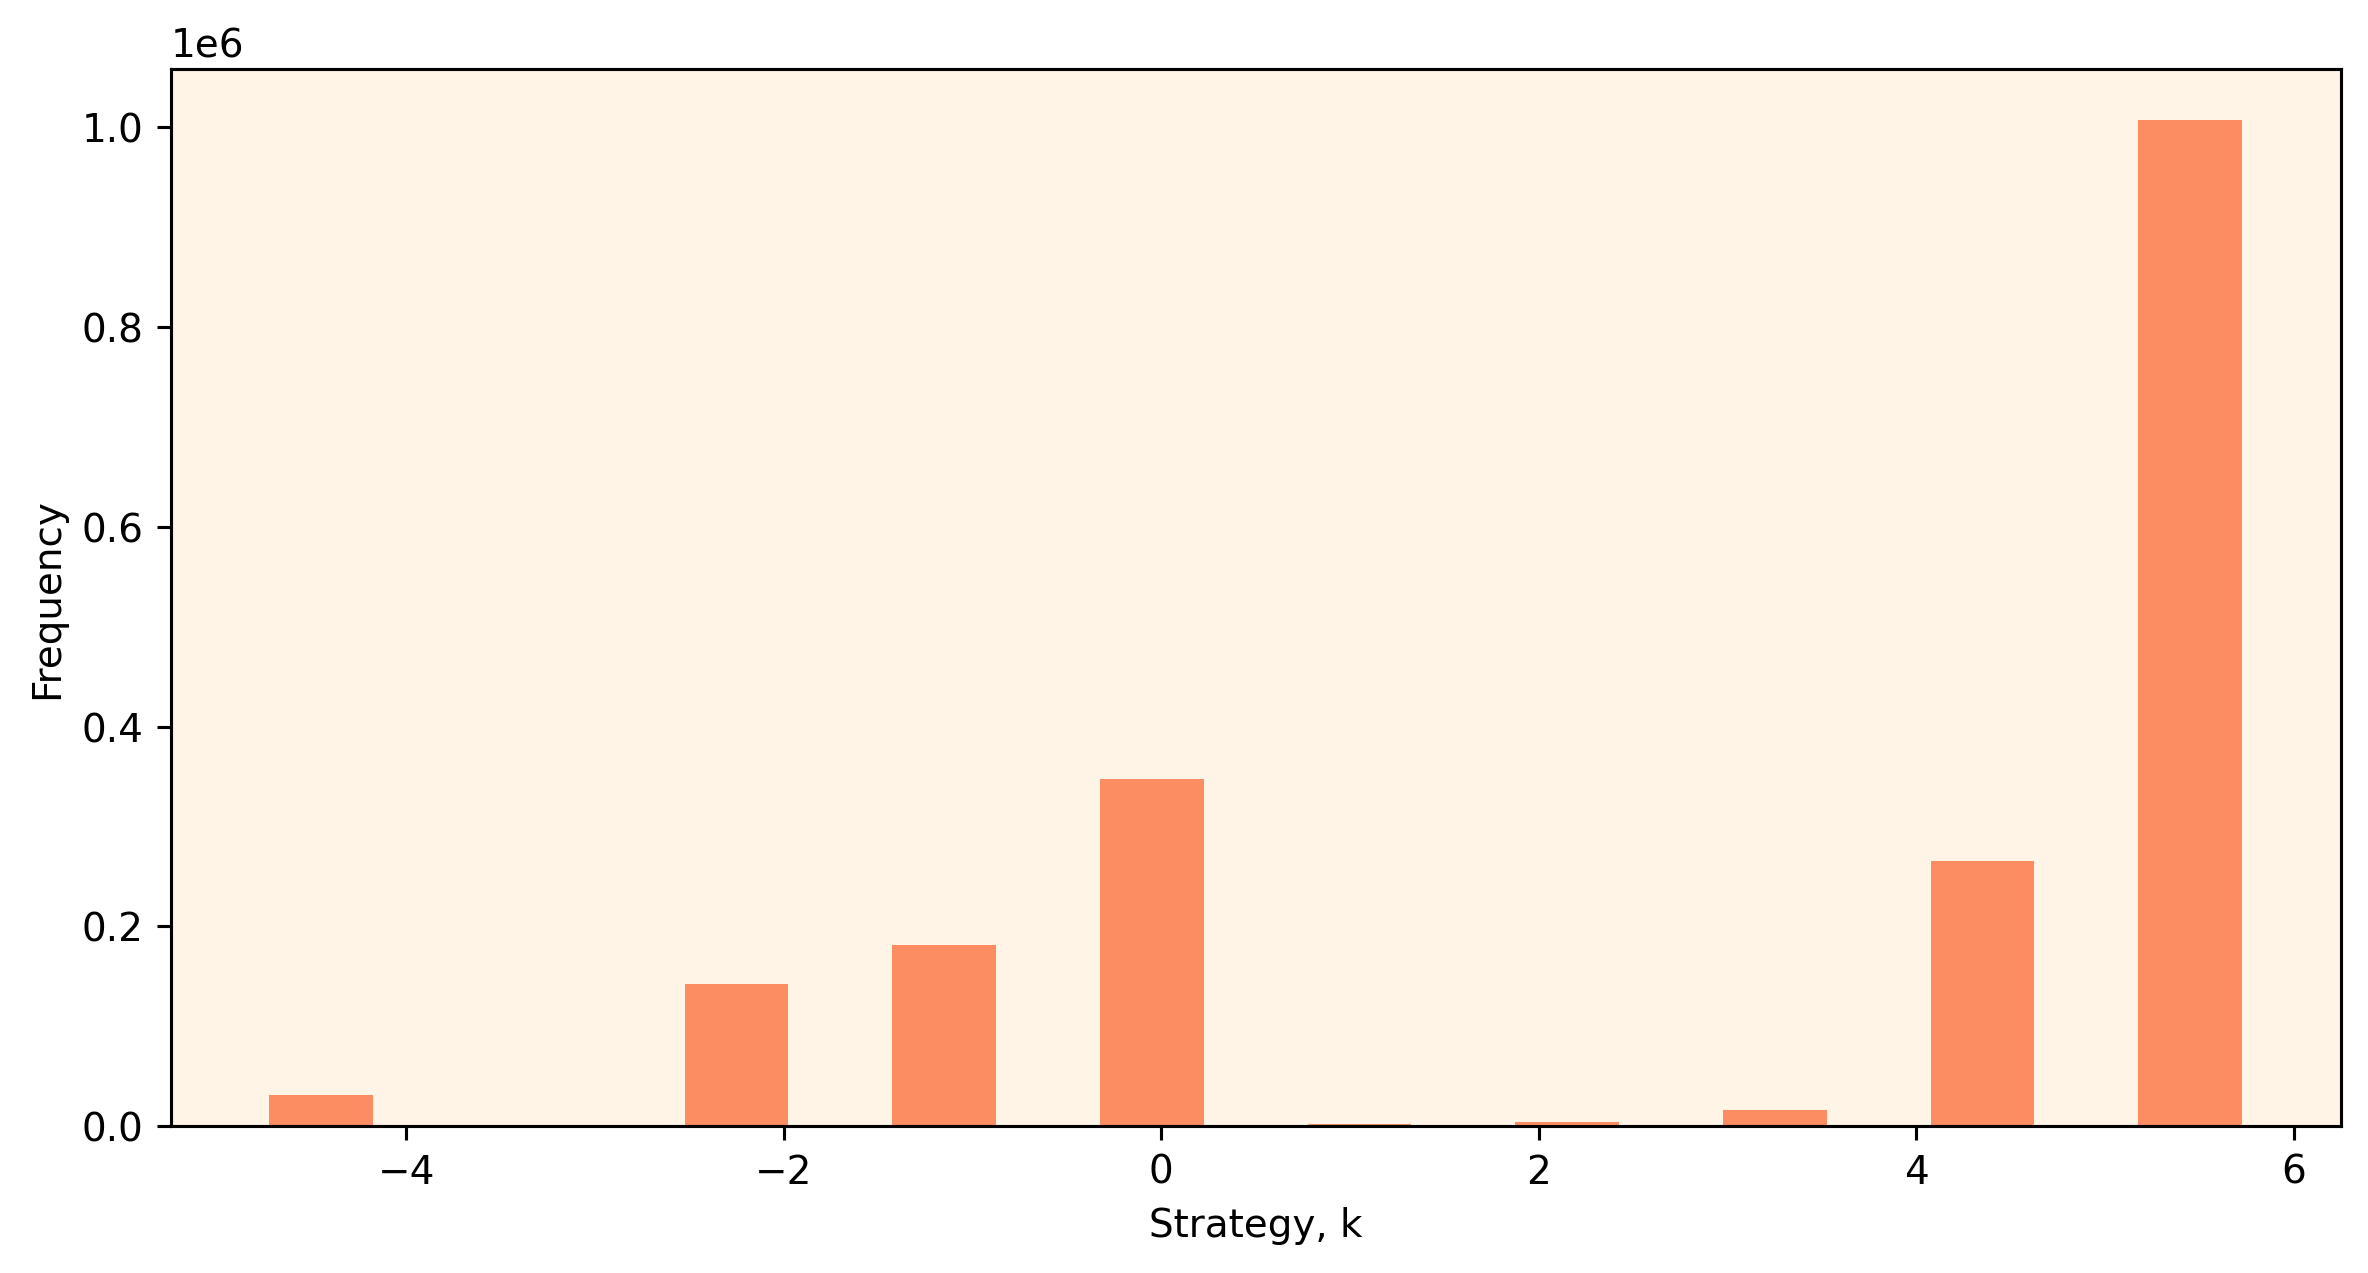

In [8]:
figure(figsize=(10, 5), dpi=280)
ax = plt.gca()
ax.set_facecolor("#fff4e6")

plt.xlabel('Strategy, k')
plt.ylabel('Frequency')
strategies_choosen_np = np.array(strategies_choosen)
plt.hist(strategies_choosen_np, color=sns.color_palette('Set2')[1], rwidth = 0.5)

plt.show()

In [38]:
import altair as alt

labels, counts = np.unique(strategies_choosen_np, return_counts=True)
print(counts)
print(sum(np.divide(counts, len(strategies_choosen_np))))
data = pd.DataFrame({'strategy':np.divide(counts, len(strategies_choosen_np)),'labels':labels,  'color':['#27AE60' for c in range(len(counts))]})
 
bar = alt.Chart(data).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    alt.X("strategy:Q", bin=alt.Bin(extent=[-6, 7], step=1)),
    #alt.X('strategy:Q'),
    alt.Y('sum(pct):Q', axis=alt.Axis(format='%'))
)

tt = alt.Chart(data).mark_bar().encode(
    alt.X("labels:Q", bin=alt.Bin(extent=[-6, 7], step=1)),
    y='strategy:Q',
)
tt

[  4126  27286    773 142261 181612 347698   2107   4656  16510 265441
 264625 742905]
1.0


alt.Chart(...)